In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import os

In [ ]:
TravelInsurancePrediction = pd.read_csv('TravelInsurancePrediction.csv')
TravelInsurancePrediction.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [2]:
df_concat = pd.read_csv('df_concat (3).csv')
df_concat.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,34,1,1,500000,4,1,0,0,1
1,1,31,1,1,1350000,3,0,1,1,1
2,2,28,1,1,1450000,6,1,1,1,1
3,3,26,1,1,1400000,5,0,1,1,1
4,4,32,0,1,850000,6,0,0,0,1


In [3]:
df_concat.rename(columns = {"Employment Type": "Employment_Type"}, inplace = True)


In [4]:
df_concat

,Unnamed: 0,Age,Employment_Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,34,1,1,500000,4,1,0,0,1
1,1,31,1,1,1350000,3,0,1,1,1
2,2,28,1,1,1450000,6,1,1,1,1
3,3,26,1,1,1400000,5,0,1,1,1
4,4,32,0,1,850000,6,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
1415,1415,28,0,1,300000,3,0,0,0,0
1416,1416,31,0,1,1200000,7,1,0,0,0
1417,1417,28,1,1,1250000,9,1,0,0,0
1418,1418,26,1,1,500000,3,0,0,0,0


In [5]:
df_concat.drop(columns=["Unnamed: 0"],inplace=True)

In [6]:
df_concat

,Age,Employment_Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,34,1,1,500000,4,1,0,0,1
1,31,1,1,1350000,3,0,1,1,1
2,28,1,1,1450000,6,1,1,1,1
3,26,1,1,1400000,5,0,1,1,1
4,32,0,1,850000,6,0,0,0,1
...,...,...,...,...,...,...,...,...,...
1415,28,0,1,300000,3,0,0,0,0
1416,31,0,1,1200000,7,1,0,0,0
1417,28,1,1,1250000,9,1,0,0,0
1418,26,1,1,500000,3,0,0,0,0


In [7]:
df_concat.to_csv("df_concat2.csv",index=False)

In [7]:
pip install  missingno

In [10]:
pip install azureml-interpret

     |████████████████████████████████| 52 kB 894 kB/s 
     |████████████████████████████████| 137 kB 10.0 MB/s 
     |████████████████████████████████| 356 kB 55.1 MB/s 
     |████████████████████████████████| 2.5 MB 48.2 MB/s 
     |████████████████████████████████| 6.6 MB 19.2 MB/s 
     |████████████████████████████████| 141 kB 58.6 MB/s 
     |████████████████████████████████| 55 kB 2.7 MB/s 
     |████████████████████████████████| 94 kB 2.9 MB/s 
     |████████████████████████████████| 59 kB 6.1 MB/s 
     |████████████████████████████████| 412 kB 46.3 MB/s 
     |████████████████████████████████| 3.0 MB 54.2 MB/s 
     |████████████████████████████████| 78 kB 6.4 MB/s 
     |████████████████████████████████| 85 kB 2.9 MB/s 
     |████████████████████████████████| 210 kB 52.8 MB/s 
     |████████████████████████████████| 928 kB 46.7 MB/s 
     |████████████████████████████████| 2.2 MB 50.5 MB/s 
     |████████████████████████████████| 40 kB 3.9 MB/s 
     |██████████████████████

In [8]:
from azureml.interpret import ExplanationClient

ModuleNotFoundError: ignored

In [8]:
print(df_concat.isnull().sum())

Age                    0
Employment_Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64


In [9]:
print(df_concat.shape)

(1420, 9)


In [ ]:
# Calcul de l'age minumun et l'age  max  
# calcul du salaire le plus faible au plus grand
# calcul du FamillyMenber le plus faible au plus grand

# Labellisation de  la  variable GraduateOrNot

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
comment = df["GraduateOrNot"]
le.fit(comment)
list(le.classes_)
df['GraduateOrNot']=le.transform(df['GraduateOrNot'])
df

## Labellisation de la variable FrequentFlyer

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
comment = df["FrequentFlyer"]
le.fit(comment)
list(le.classes_)
df['FrequentFlyer']=le.transform(df['FrequentFlyer'])
df

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
comment = df["EverTravelledAbroad"]
le.fit(comment)
list(le.classes_)
df['EverTravelledAbroad']=le.transform(df['EverTravelledAbroad'])
df

list_of_single_column = list(df['Employment Type'])
unique_list = list(dict.fromkeys(list_of_single_column))
print(unique_list)

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
comment = df["Employment Type"]
le.fit(comment)
list(le.classes_)
df['Employment Type']=le.transform(df['Employment Type'])
df

## Government Sector -> 0  Private Sector/Self Employed	->1

In [10]:
list_of_single_column = list(df_concat['Age']) 

In [11]:
print(df_concat.shape)

(1420, 9)


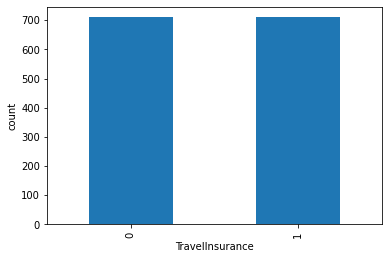

In [12]:
target = 'TravelInsurance'
df_concat.groupby(target)['Age'].count().plot.bar()
plt.xlabel(target)
plt.ylabel('count')
plt.show()

In [13]:
# couper le dataset d'un coté les 1 et de l'autre les zeros 
# faire un shape sur les un et les zeros
# prendre les 710 lignes du dataset des zéros

In [14]:
print(df_concat.isnull().sum())

Age                    0
Employment_Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64


In [15]:
df_max_Age=df_concat['Age'].max()
df_max_Age

35

In [16]:
df_min_Age=df_concat['Age'].min()
df_min_Age

25

In [17]:
df_min_FamilyMembers=df_concat['FamilyMembers'].min()
df_min_FamilyMembers

2

In [18]:
df_min_FamilyMembers=df_concat['FamilyMembers'].max()
df_min_FamilyMembers

9

In [19]:
df_max_AnnualIncome=df_concat['AnnualIncome'].max()
df_max_AnnualIncome

1800000

In [20]:
df_min_AnnualIncome=df_concat['AnnualIncome'].min()
df_min_AnnualIncome

300000

In [21]:
cordia=df_concat.corr()
print(cordia)

                          Age  ...  TravelInsurance
Age                  1.000000  ...         0.073648
Employment_Type     -0.128906  ...         0.159071
GraduateOrNot        0.043026  ...         0.019917
AnnualIncome        -0.052370  ...         0.393958
FamilyMembers        0.072701  ...         0.054977
ChronicDiseases      0.032752  ...         0.010934
FrequentFlyer       -0.041664  ...         0.231503
EverTravelledAbroad -0.020555  ...         0.408070
TravelInsurance      0.073648  ...         1.000000

[9 rows x 9 columns]


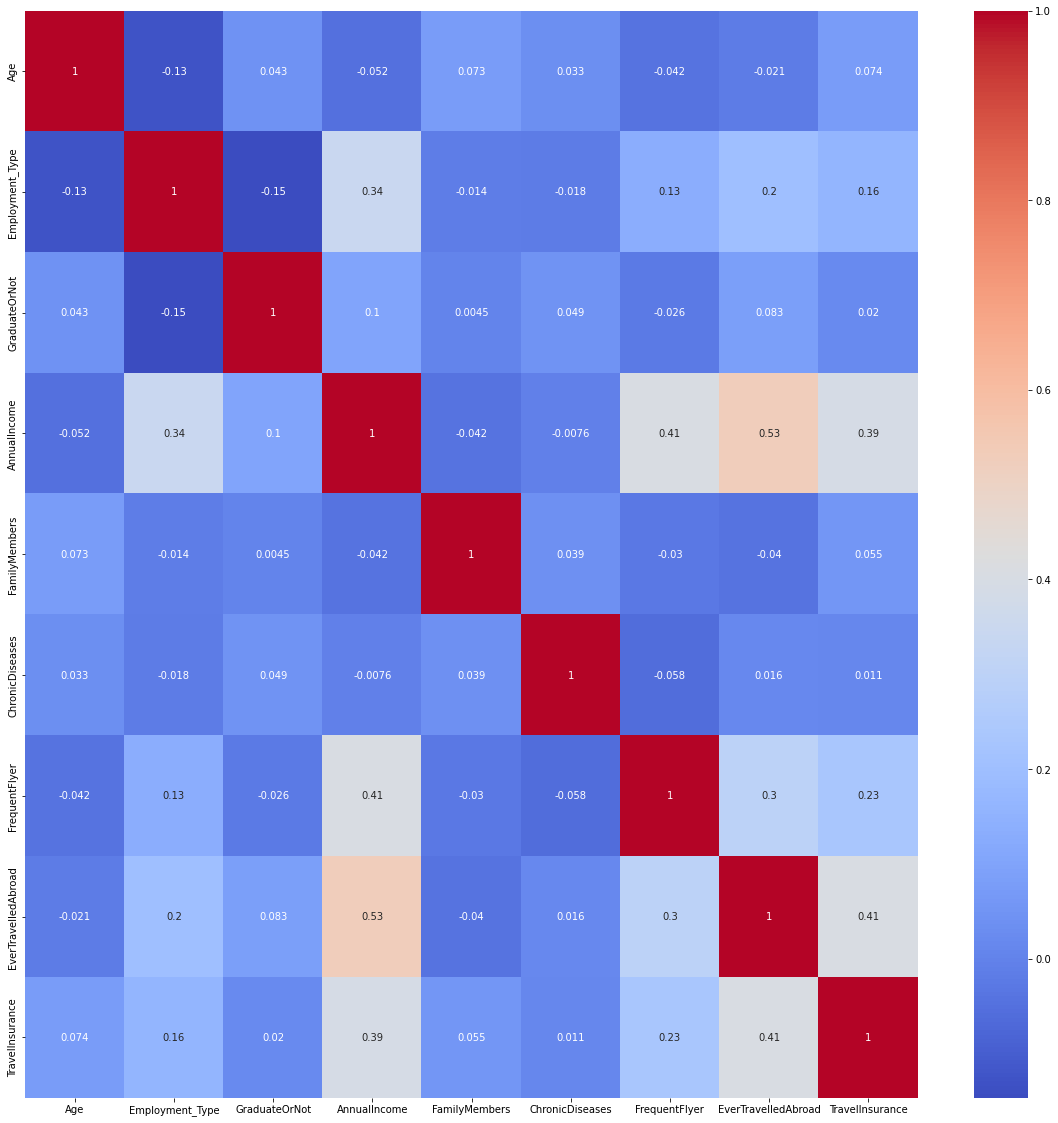

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import  seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(cordia,annot=True, square =False,  cmap="coolwarm")

In [23]:
X = df_concat.drop(columns=['TravelInsurance'])
X

,Age,Employment_Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
0,34,1,1,500000,4,1,0,0
1,31,1,1,1350000,3,0,1,1
2,28,1,1,1450000,6,1,1,1
3,26,1,1,1400000,5,0,1,1
4,32,0,1,850000,6,0,0,0
...,...,...,...,...,...,...,...,...
1415,28,0,1,300000,3,0,0,0
1416,31,0,1,1200000,7,1,0,0
1417,28,1,1,1250000,9,1,0,0
1418,26,1,1,500000,3,0,0,0


In [24]:
y = df_concat['TravelInsurance']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [26]:
len(X_test)


284

X_test.head()

## Datavisualisation

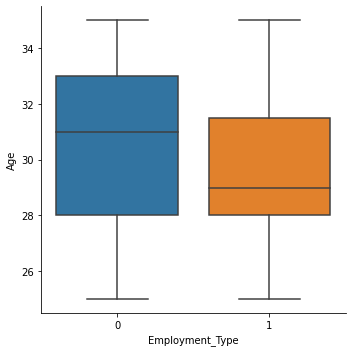

In [27]:
sns.catplot(x="Employment_Type", y="Age", kind="box", data=df_concat)

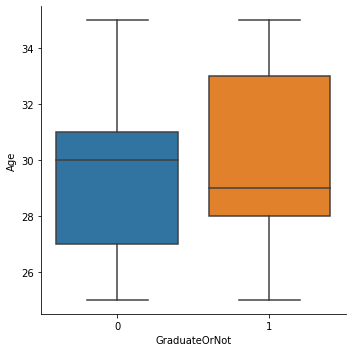

In [28]:
sns.catplot(x="GraduateOrNot", y="Age", kind="box", data=df_concat)

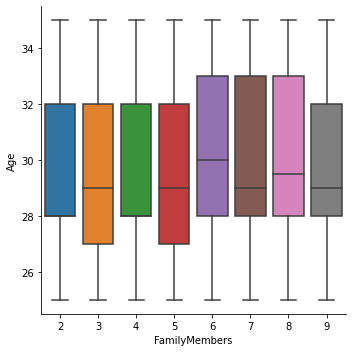

In [29]:
sns.catplot(x="FamilyMembers", y="Age", kind="box", data=df_concat)

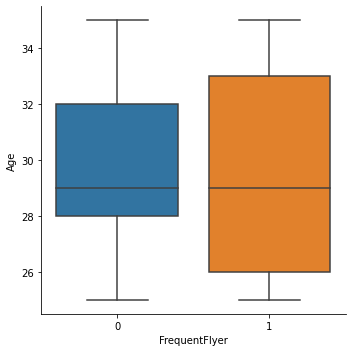

In [30]:
sns.catplot(x="FrequentFlyer", y="Age", kind="box", data=df_concat)

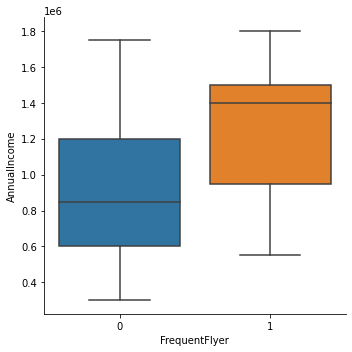

In [31]:
sns.catplot(x="FrequentFlyer", y="AnnualIncome", kind="box", data=df_concat)

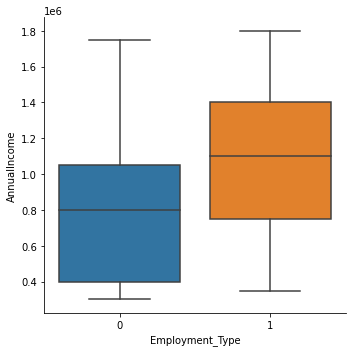

In [32]:
sns.catplot(x="Employment_Type", y="AnnualIncome", kind="box", data=df_concat)

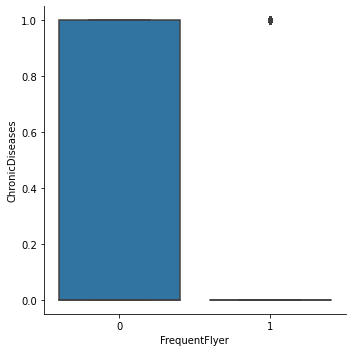

In [33]:
sns.catplot(x="FrequentFlyer", y="ChronicDiseases", kind="box", data=df_concat)

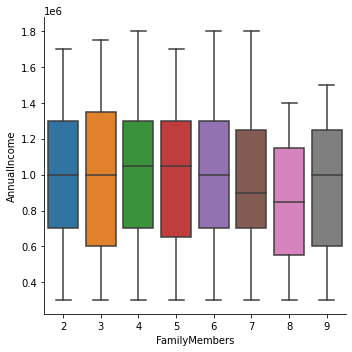

In [34]:
sns.catplot(x="FamilyMembers", y="AnnualIncome", kind="box", data=df_concat)

## modele de  classification

# KNN

In [ ]:
#knn 
from sklearn.neighbors import KNeighborsClassifier as KNN 
ngh = KNN(n_neighbors=3)
Kb = ngh.fit(X_train,y_train)
print(ngh.classes_,'\n',ngh.effective_metric_,ngh.effective_metric_params_,ngh.outputs_2d_)

[0 1] 
 euclidean {} False


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:

Ypred_knn=Kb.predict(X_test)
Ypred_knn

array([1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1])

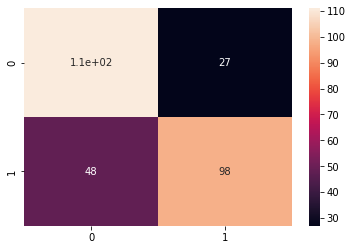

In [ ]:
sns.heatmap(confusion_matrix(y_test,Ypred_knn),annot=True)
plt.show()

In [ ]:
Ypred_knn=Kb.predict(X_test)
print(Ypred_knn[1])

1


In [ ]:
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range) 
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    2.6s finished


In [ ]:
Ypred_knn_cv=grid_search.predict(X_train)
print(Ypred_knn_cv[1])

0


In [ ]:
Ypred_knn_cv_test=grid_search.predict(X_test)
print(Ypred_knn_cv_test[1])

1


In [ ]:
print(grid_search.best_params_)

{'n_neighbors': 6}


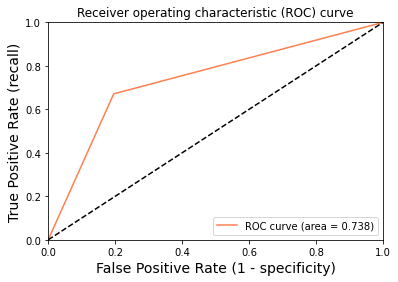

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
y_pred_proba = Kb.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, Ypred_knn)
plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score as acc
from sklearn.model_selection import GridSearchCV as GCV
acc(y_test,Ypred_knn)

0.7359154929577465

In [ ]:
from sklearn.metrics import roc_auc_score
ngh = KNN(n_neighbors=3)
Kb = ngh.fit(X_train,y_train)
roc_auc_score(y,Kb.predict_proba(X)[:, 1])

0.9018666931164452

In [ ]:
from sklearn import metrics 
from sklearn.metrics import f1_score
f1_score(y_test,Ypred_knn, average='macro')

0.735360989973536

In [ ]:
knn = KNeighborsClassifier(algorithm = 'brute')

In [ ]:
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    2.8s finished


In [ ]:
y_pred_knn_cv=grid_search.predict(X_test)
print(y_pred_knn_cv[1])

1


In [ ]:
y_pred_knn_cv_train=grid_search.predict(X_train)
print(y_pred_knn_cv_train[1])

0


In [ ]:
print(accuracy_score(y_test,y_pred_knn_cv))
print(accuracy_score(y_train, y_pred_knn_cv_train))

0.7464788732394366
0.801056338028169


In [ ]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
X = df_concat.drop(columns=['TravelInsurance'])
y = df_concat['TravelInsurance']
classifier = KNN()
skf = StratifiedKFold(n_splits=10)
scores = cross_val_score(classifier, X, y, cv=skf)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.69014085 0.71830986 0.77464789 0.73239437 0.78873239 0.68309859
 0.78169014 0.71126761 0.72535211 0.71830986]


##  SVC modele

In [ ]:
#SVM
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X, y)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='auto', kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [ ]:

Ypred_svc=clf.predict(X_test)
Ypred_svc

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1])

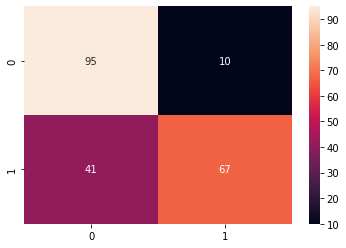

In [ ]:
sns.heatmap(confusion_matrix(y_test,Ypred_svc),annot=True)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
clf.get_params()

{'memory': None,
 'steps': [('standardscaler',
   StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('svc',
   SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
       decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
       max_iter=-1, probability=False, random_state=None, shrinking=True,
       tol=0.001, verbose=False))],
 'verbose': False,
 'standardscaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'svc': SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
     max_iter=-1, probability=False, random_state=None, shrinking=True,
     tol=0.001, verbose=False),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'svc__C': 1.0,
 'svc__break_ties': False,
 'svc__cache_size': 200,
 'svc__class_weight': None,
 'svc__coef0': 0.0,
 'svc__decision_function_shape': 'ovr',
 '

In [ ]:

from sklearn.model_selection import GridSearchCV
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
# fitting the model for grid search
cvc=grid.fit(X_train, y_train)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.624, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.570, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.660, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.622, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.556, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.731, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    6.5s finished


In [ ]:
# print best parameter after tuning
print(grid.best_params_)
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [ ]:
y_pred_svc=cvc.predict(X_test)
print(y_pred_svc[1])

1


In [ ]:
y_pred_svc_train=cvc.predict(X_train)
print(y_pred_svc_train[1])

1


In [ ]:
from sklearn.metrics import accuracy_score as acc
from sklearn.model_selection import GridSearchCV as GCV
acc(y_test,Ypred_svc)

0.7605633802816901

In [ ]:
from sklearn import metrics 
from sklearn.metrics import f1_score
f1_score(y_test,Ypred_svc, average='macro')

0.7563530335314568

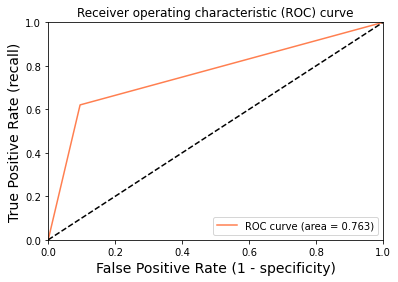

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
y_pred_proba = Kb.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, Ypred_svc)
plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
X = df_concat.drop(columns=['TravelInsurance'])
y = df_concat['TravelInsurance']
classifier = SVC()
skf = StratifiedKFold(n_splits=10)
scores = cross_val_score(classifier, X, y, cv=skf)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.66901408 0.66901408 0.72535211 0.66197183 0.71830986 0.67605634
 0.70422535 0.71126761 0.6971831  0.71126761]


# # GradientBoostingClassifier

In [35]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
gbc.fit(X_train,y_train)
gbc

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

In [36]:
Ypred_gbc=gbc.predict(X_test)
Ypred_gbc

array([0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1])

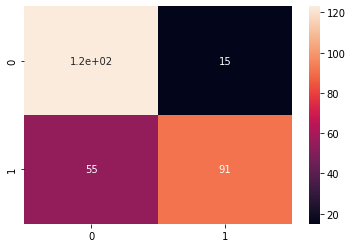

In [37]:
sns.heatmap(confusion_matrix(y_test, Ypred_gbc),annot=True)
plt.show()

In [38]:
from sklearn import metrics 
from sklearn.metrics import f1_score
f1_score(y_test,Ypred_gbc, average='macro')

0.7503516174402249

In [39]:
Ypred_gbc_test=gbc.predict(X_test)
print(Ypred_gbc_test[1])

1


In [40]:
Ypred_gbc_train=gbc.predict(X_train)
print(Ypred_gbc_train[1])

0


In [41]:
from sklearn.metrics import accuracy_score as acc
from sklearn.model_selection import GridSearchCV as GCV
acc(y_test,Ypred_gbc)

0.7535211267605634

In [42]:
print(accuracy_score(y_test,Ypred_gbc_test))
print(accuracy_score(y_train, Ypred_gbc_train))

0.7535211267605634
0.7640845070422535


In [43]:
gbc.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 1.0,
 'loss': 'deviance',
 'max_depth': 1,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 0,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
#creating Scoring parameter: 
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score),'recall':make_scorer(recall_score)}

# A sample parameter

parameters = {
    #"loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10,100,1000]
    }
#passing the scoring function in the GridSearchCV
clf = GridSearchCV(gbc, parameters, scoring=scoring,refit=False,cv=2, n_jobs=-1)
clf_fit_model=clf.fit(X_train, y_train)
#converting the clf.cv_results to dataframe

In [ ]:
print('Meilleurs hyperparamètres :', clf.best_params_)
clf_predicted_train=clf_fit_model.predict(X_train)
clf_predicted_test=clf_fit_model.predict(X_test)
clf_acc_train=clf.accuracy_score(y_train, clf_predicted_train)
clf_acc_test=clf.accuracy_score(y_test,clf_predicted_test)
print('Accuracy train :', clf_acc_train)
print('Accuracy test:', clf_acc_test)

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
X = df_concat.drop(columns=['TravelInsurance'])
y = df_concat['TravelInsurance']
classifier =GradientBoostingClassifier()
skf = StratifiedKFold(n_splits=10)
scores = cross_val_score(classifier, X, y, cv=skf)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.75352113 0.75352113 0.76760563 0.77464789 0.80985915 0.6971831
 0.8028169  0.6971831  0.78873239 0.76056338]


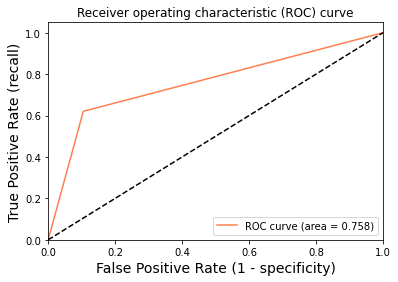

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
y_pred_proba = gbc.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, Ypred_gbc)
plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

## AdaBoostClassifier

In [ ]:
# AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
ABC= AdaBoostClassifier(n_estimators=100, random_state=0)
ABC.fit(X_train,y_train)
ABC

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=0)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
ABC= AdaBoostClassifier(n_estimators=100, random_state=0)
y_pred_ABC = ABC.fit(X_train, y_train).predict(X_test)
y_pred_ABC

array([1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,

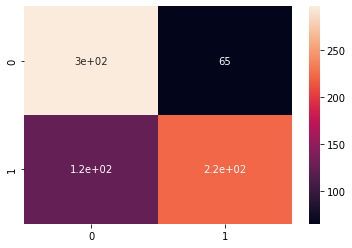

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred_ABC),annot=True)
plt.show()

In [ ]:
from sklearn import metrics 
from sklearn.metrics import f1_score
f1_score(y_test,y_pred_ABC, average='macro')

0.8147791396761945

In [ ]:
y_pred=ABC.predict(X_test)
print(y_pred[1])

1


In [ ]:
from sklearn.model_selection import GridSearchCV
ABC.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 100,
 'random_state': 0}

In [ ]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6],
    'criterion' :['gini', 'entropy']
}

In [ ]:
CV_ABC = GridSearchCV(estimator=ABC, param_grid=param_grid, cv= 5)
CV_ABC

GridSearchCV(cv=5, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=100,
                                          random_state=0),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
y_pred_ABC=ABC.predict(X_test)
print(y_pred_ABC[1])

1


In [ ]:
y_pred_ABC_train=ABC.predict(X_train)
print(y_pred_ABC_train[1])

0


In [ ]:
print(accuracy_score(y_train, y_pred_ABC_train))
print(accuracy_score(y_test, y_pred_ABC))



0.8690140845070422
0.8169014084507042


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [1, 2]
             }

DTC = DecisionTreeClassifier(random_state = 11, max_features = "auto", class_weight = "auto",max_depth = None)
ABC = AdaBoostClassifier(base_estimator = DTC)
# run grid search
grid_search_ABC = GridSearchCV(ABC, param_grid=param_grid, scoring = 'roc_auc')

In [ ]:
abc = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())
parameters = {'base_estimator__max_depth':[i for i in range(2,11,2)],
              'base_estimator__min_samples_leaf':[5,10],
              'n_estimators':[10,50,250,1000],
              'learning_rate':[0.01,0.1]}
clf= GridSearchCV(abc, parameters,verbose=3,scoring='f1',n_jobs=-1)
clf.fit(X_train,y_train)
print(clf.best_params_)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
{'base_estimator__max_depth': 4, 'base_estimator__min_samples_leaf': 5, 'learning_rate': 0.01, 'n_estimators': 10}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   52.4s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  1.3min finished


In [ ]:
abc = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())
parameters = {'base_estimator__max_depth':[i for i in range(4)],
              'base_estimator__min_samples_leaf':[5],
              'n_estimators':[10],
              'learning_rate':[0.01]}
clf= GridSearchCV(abc, parameters,verbose=3,scoring='f1',n_jobs=-1)
print(clf.fit(X_train,y_train))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
GridSearchCV(cv=None, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                                class_weight=None,
                                                                                criterion='gini',
                                                                                max_depth=None,
                                                                                max_features=None,
                                                                                max_leaf_nodes=None,
                                                                                min_impurity_decrease=0.0,
                                                                                min_impurity_split=None,
                                      

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.1s finished


In [ ]:
y_pred_ABC_vc_test=clf.predict(X_test)
print(y_pred_ABC_vc_test[1])

1


In [ ]:
y_pred_ABC_vc_train=clf.predict(X_train)
print(y_pred_ABC_vc_train[1])

0


In [ ]:
print(accuracy_score(y_test, y_pred_ABC_vc_test))
print(accuracy_score(y_train, y_pred_ABC_vc_train))
a=accuracy_score(y_test, y_pred_ABC_vc_test)
b=accuracy_score(y_train, y_pred_ABC_vc_train)
print(round (a,2))
print(round (b,2))

0.8450704225352113
0.8394366197183099
0.85
0.84


# decissiontreeclassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(max_depth=3,min_samples_leaf=10)
DTC.fit(X_train,y_train)
DTC

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred_DTC_vc_train=DTC.predict(X_train)

In [ ]:
print(y_pred_DTC_vc_train,'\n',type(y_pred_DTC_vc_train))

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 1 0 1 0 1 0 1 0 0 1 0 1
 1 0 1 0 1 0 0 1 1 1 0 1 1 0 1 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0
 1 1 0 0 1 1 1 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0
 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0
 0 0 0 1 0 1 1 1 0 1 0 1 1 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 1 0 0 0
 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0
 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 0 0 1 1
 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 0 0
 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1
 1 0 1 1 0 0 1 1 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0
 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0
 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0
 1 0 1 1 0 0 0 0 0 1 0 0 

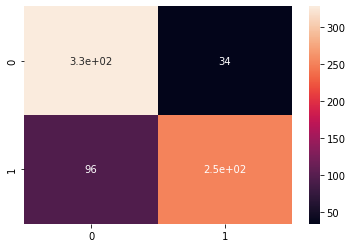

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
DTC.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 10,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [ ]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6],
    'criterion' :['gini', 'entropy']
}

In [ ]:
CV_DTC = GridSearchCV(estimator=DTC, param_grid=param_grid, cv= 5)
CV_DTC 

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=3,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=10,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [2, 3],
                         'max_feat

In [ ]:
accuracy_score(y_test, y_pred2)

0.8464788732394366

In [ ]:
from sklearn import metrics 
from sklearn.metrics import f1_score
f1_score(y_test,y_pred, average='macro')

0.8147791396761945

In [ ]:
accuracy_score(y_train, y_pred2)

0.4971830985915493

In [ ]:
clf_train3=CV_DTC.accuracy_score(X_train, y_train)
clf_score_test3=CV_DTC.accuracy_score(X_test,y_test)

AttributeError: 'GridSearchCV' object has no attribute 'scorer_'

In [ ]:
y_pred2=DTC.predict(X_test)
print(y_pred2[1])

1


In [ ]:
y_pred2=DTC.predict(X_test)
print(y_pred2[1])

In [ ]:
from sklearn.metrics import accuracy_score as acc
from sklearn.model_selection import GridSearchCV as GCV
acc(y_test,y_pred)

0.8169014084507042

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(max_depth=3,min_samples_leaf=10)
accuracy_score(y_test, y_pred2)


0.8464788732394366

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
y_pred_proba = DTC.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

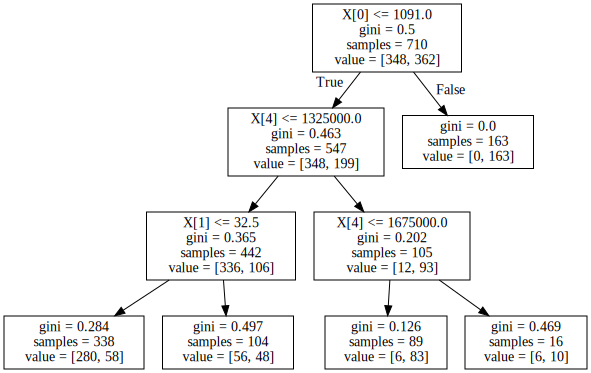

In [ ]:
from sklearn import tree
import graphviz 
from IPython.display import display
display(graphviz.Source(tree.export_graphviz(DTC)))

# RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=1000)
RFC.fit(X_train,y_train)

In [ ]:
Ypred_RFC=RFC.predict(X_test)
Ypred_RFC

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1])

In [ ]:
y_pred3=RFC.predict(X_test)


In [ ]:
print(accuracy_score(y_train, y_pred3))
print(accuracy_score(y_test, y_pred3))

ValueError: Found input variables with inconsistent numbers of samples: [1136, 284]

In [ ]:
pred=RFC.predict(X_test)
print(pred[1])

1


In [ ]:
from sklearn.model_selection import GridSearchCV
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [100, 500,1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2,3]
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)
print(CV_rfc.best_params_)

{'max_depth': 2, 'max_features': 'auto', 'n_estimators': 100}


In [ ]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
result_CV_rfc=CV_rfc.fit(X_train, y_train)
CV_rfc.best_params_

{'max_depth': 2, 'max_features': 'auto', 'n_estimators': 100}

In [ ]:
clf_predicted_train3=result_CV_rfc.predict(X_train)
clf_predicted_test3=result_CV_rfc.predict(X_test)
clf_accuracy_train3=accuracy_score(y_train,clf_predicted_train3)
clf_accuracy_test3=accuracy_score(y_test,clf_predicted_test3)
print(clf_accuracy_test3)
print(clf_accuracy_train3)

1.0
1.0


In [ ]:
rfc1=RandomForestClassifier(random_state=42, max_features='log2', n_estimators= 500, max_depth=3)

In [ ]:
from sklearn import metrics 
from sklearn.metrics import f1_score
f1_score(y_test,Ypred_RFC, average='macro')

0.8329744816586923

In [ ]:
from sklearn.metrics import accuracy_score as acc
from sklearn.model_selection import GridSearchCV as GCV
acc(y_test,Ypred_RFC)

0.8338028169014085

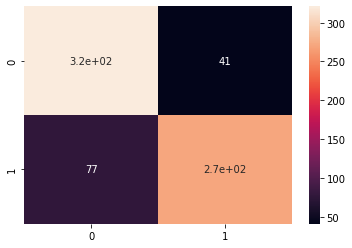

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred3),annot=True)
plt.show()

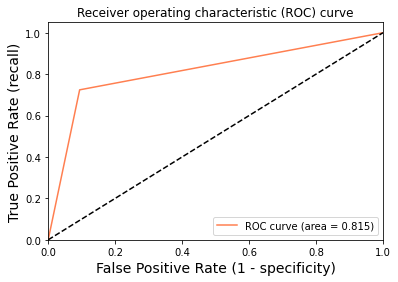

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
y_pred_proba = RFC.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
#creating Scoring parameter: 
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score),'recall':make_scorer(recall_score)}

# A sample parameter
parameters = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2,0.3,0.5],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10]
    }
#passing the scoring function in the GridSearchCV
gbc = GridSearchCV(GradientBoostingClassifier(), parameters,scoring=scoring,refit=False,cv=2, n_jobs=-1)
gbc.fit(X_train, y_train)

exception calling callback for <Future at 0x7fe196595f98 state=finished returned list>
Traceback (most recent call last):
  File "/anaconda/envs/azureml_py36/lib/python3.6/site-packages/joblib/externals/loky/_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "/anaconda/envs/azureml_py36/lib/python3.6/site-packages/joblib/parallel.py", line 340, in __call__
    self.parallel.dispatch_next()
  File "/anaconda/envs/azureml_py36/lib/python3.6/site-packages/joblib/parallel.py", line 769, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "/anaconda/envs/azureml_py36/lib/python3.6/site-packages/joblib/parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "/anaconda/envs/azureml_py36/lib/python3.6/site-packages/joblib/parallel.py", line 754, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/anaconda/envs/azureml_py36/lib/python3.6/site-packages/joblib/_parallel_backends.py", line 551, in ap

KeyboardInterrupt: 

In [ ]:
abc = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())
parameters = {'base_estimator__max_depth':[i for i in range(2,11,2)],
              'base_estimator__min_samples_leaf':[5,10],
              'n_estimators':[10,50,250,1000],
              'learning_rate':[0.01,0.1]}
clf = GridSearchCV(abc, parameters,verbose=3,scoring='f1',n_jobs=-1)
clf.fit(X_train,y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   24.7s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  1.5min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                                class_weight=None,
                                                                                criterion='gini',
                                                                                max_depth=None,
                                                                                max_features=None,
                                                                                max_leaf_nodes=None,
                                                                                min_impurity_decrease=0.0,
                                                                                min_impurity_split=None,
                                                                                min_samples_leaf=1

In [ ]:
clf = GridSearchCV(abc, parameters,verbose=3,scoring='f1',n_jobs=-1)
clf.fit(X_train,y_train)
pickle.dump(clf, open('model_ABC_cv.pkl','wb'))

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed:   26.4s
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  1.5min finished


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
#creating Scoring parameter: 
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score),'recall':make_scorer(recall_score)}
# A sample parameter
parameters = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2,0.3,0.5],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10]
    }
#passing the scoring function in the GridSearchCV
gbc = GridSearchCV(GradientBoostingClassifier(), parameters,scoring=scoring,refit=False,cv=2, n_jobs=-1)
gbc.fit(X_train, y_train)

GridSearchCV(cv=2, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_c...
                 

In [ ]:
gbc = GridSearchCV(GradientBoostingClassifier(), parameters,scoring=scoring,refit=False,cv=2, n_jobs=-1)
gbc.fit(X_train, y_train)
pickle.dump(clf, open('model_gbc_cv.pkl','wb'))